Michael P. Ramirez

Project uses data from the INSITE project, a Baltimore-based cluster randomized intervention focused on the population of people who inject drugs and utilize care from the integrated care van. More information on the study can be found on: https://clinicaltrials.gov/ct2/show/NCT03567174

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import base64
from io import BytesIO
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, auc
import statsmodels.formula.api as smf
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import plotly
from IPython.display import IFrame
import seaborn as sns
import plotly as py
import base64
from io import BytesIO
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [34]:
insite = pd.read_stata("/Users/mpramirez/Documents/Research /INSITE/INSITE OVERDOSE.dta")
insite = insite[['co_overdose_w1', 'age3_w0', 'race_bwo_w0',  'sex2_w0', 'edu3_w0',  'homeless_w0',  'jail_12m_w0',
                   'health_w0' ,  'agg_phys_w0', 'agg_ment_w0', 'overdose_6m_w0' ,  'fentanyl1_w0' ,  'inj_fentanyl_w0' , 
                    'inj_speedball_w0',  'inj_30d_cat2_w0', 'co_nalox_nearby_w0', 'du_methadone_6mo_yn_w0',  'co_ssp_w0',  
                    'co_ost_6m_w0',  'inj_share_syr_6mo_yn_w0',  'co_ed_w0',  'baseline_40_w0']]  
insite = insite.set_axis(['futureoverdose','agegroup', 'race', 'sex', 'education', 'homeless', 'jail', 'health',
                          'physicalhealth', 'mentalhealth', 'pastoverdose', 'fentanylpositive', 'injfentanyl',
                          'speedball', 'injection', 'naloxone', 'methadone', 'ssp', 'ost', 'shareinjections', 'ed', 'hospitalstay'], axis=1, copy=False)
insite

/var/folders/5c/1gmp4x5j6cx9jjf6sl_82gxw0000gn/T/ipykernel_82103/1464918574.py:1: UserWarning:

Encountered %tC format. Leaving in Stata Internal Format.

/var/folders/5c/1gmp4x5j6cx9jjf6sl_82gxw0000gn/T/ipykernel_82103/1464918574.py:1: UserWarning:

Encountered %tC format. Leaving in Stata Internal Format.

/var/folders/5c/1gmp4x5j6cx9jjf6sl_82gxw0000gn/T/ipykernel_82103/1464918574.py:1: UserWarning:

Encountered %tC format. Leaving in Stata Internal Format.

/var/folders/5c/1gmp4x5j6cx9jjf6sl_82gxw0000gn/T/ipykernel_82103/1464918574.py:1: UserWarning:

Encountered %tC format. Leaving in Stata Internal Format.

/var/folders/5c/1gmp4x5j6cx9jjf6sl_82gxw0000gn/T/ipykernel_82103/1464918574.py:1: UserWarning:

Encountered %tC format. Leaving in Stata Internal Format.

/var/folders/5c/1gmp4x5j6cx9jjf6sl_82gxw0000gn/T/ipykernel_82103/1464918574.py:1: UserWarning:

Encountered %tC format. Leaving in Stata Internal Format.

/var/folders/5c/1gmp4x5j6cx9jjf6sl_82gxw0000gn/T/ipykernel_82103/14649

,futureoverdose,agegroup,race,sex,education,homeless,jail,health,physicalhealth,mentalhealth,...,injfentanyl,speedball,injection,naloxone,methadone,ssp,ost,shareinjections,ed,hospitalstay
0,No,60 or older,Black,Male,Less than high school grad,No,No,Very good,29.370947,23.817867,...,0.0,1.0,60 or more,No,1.0,Used SSP in last 6 months or no IDU,No,No,No ED visits in past 6 months,(1) Yes
1,No,35-59,Black,Female,Less than high school grad,No,No,Fair,34.282203,29.654421,...,0.0,1.0,60 or more,Yes,0.0,Used SSP in last 6 months or no IDU,No,Yes,One or more ED visits in past 6 months,(0) No
2,No,35-59,Black,Female,High school grad or GED,No,No,Good,54.408461,44.011476,...,1.0,0.0,60 or more,No,0.0,Used SSP in last 6 months or no IDU,No,Yes,No ED visits in past 6 months,(0) No
3,No,35-59,Black,Male,High school grad or GED,No,No,Good,43.053444,59.066600,...,0.0,1.0,60 or more,Yes,1.0,IDU but did not use SSP in last 6 months,Yes,No,No ED visits in past 6 months,(0) No
4,No,35-59,Black,Female,At least some college,No,No,Very good,44.386424,41.517564,...,0.0,1.0,60 or more,Yes,0.0,Used SSP in last 6 months or no IDU,No,No,One or more ED visits in past 6 months,(0) No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,No,35-59,Black,Male,At least some college,Yes,No,Poor,41.967526,30.214166,...,0.0,1.0,60 or more,Yes,1.0,IDU but did not use SSP in last 6 months,Yes,No,One or more ED visits in past 6 months,(0) No
698,No,35-59,Black,Female,Less than high school grad,No,No,Very good,49.343544,15.976602,...,0.0,1.0,60 or more,Yes,0.0,IDU but did not use SSP in last 6 months,Yes,Yes,No ED visits in past 6 months,(0) No
699,No,35-59,Black,Male,High school grad or GED,No,Yes,Fair,55.071714,45.723243,...,0.0,1.0,60 or more,No,0.0,Used SSP in last 6 months or no IDU,No,Yes,One or more ED visits in past 6 months,(1) Yes
700,NaN,35-59,White,Male,High school grad or GED,No,No,Good,52.156258,39.144615,...,0.0,1.0,60 or more,No,1.0,Used SSP in last 6 months or no IDU,Yes,Yes,One or more ED visits in past 6 months,(1) Yes


In [35]:
insite.replace(['Yes', 'No'], [1,0], inplace=True)
insite['hospitalstay'].replace(['(1) Yes', '(0) No'], [1,0], inplace=True)
insite['education'].replace(['Less than high school grad', 'High school grad or GED', 'At least some college'],
                           [2,1,0], inplace=True)
insite['ed'].replace(['No ED visits in past 6 months', 'One or more ED visits in past 6 months'],
                           [0,1], inplace=True)
insite['ssp'].replace(['IDU but did not use SSP in last 6 months', 'Used SSP in last 6 months or no IDU'],
                           [0,1], inplace=True)
insite['agegroup'].replace(['60 or older'],['60<'], inplace=True)
insite['health'].replace(['Very good'],['Very-good'], inplace=True)
insite['futureoverdose'].fillna(0, inplace=True)
insite = insite.dropna()
insite


,futureoverdose,agegroup,race,sex,education,homeless,jail,health,physicalhealth,mentalhealth,...,injfentanyl,speedball,injection,naloxone,methadone,ssp,ost,shareinjections,ed,hospitalstay
0,0,60<,Black,Male,2,0,0,Very-good,29.370947,23.817867,...,0.0,1.0,60 or more,0,1.0,1,0,0,0,1
1,0,35-59,Black,Female,2,0,0,Fair,34.282203,29.654421,...,0.0,1.0,60 or more,1,0.0,1,0,1,1,0
2,0,35-59,Black,Female,1,0,0,Good,54.408461,44.011476,...,1.0,0.0,60 or more,0,0.0,1,0,1,0,0
3,0,35-59,Black,Male,1,0,0,Good,43.053444,59.066600,...,0.0,1.0,60 or more,1,1.0,0,1,0,0,0
4,0,35-59,Black,Female,0,0,0,Very-good,44.386424,41.517564,...,0.0,1.0,60 or more,1,0.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0,35-59,Black,Male,0,1,0,Poor,41.967526,30.214166,...,0.0,1.0,60 or more,1,1.0,0,1,0,1,0
698,0,35-59,Black,Female,2,0,0,Very-good,49.343544,15.976602,...,0.0,1.0,60 or more,1,0.0,0,1,1,0,0
699,0,35-59,Black,Male,1,0,1,Fair,55.071714,45.723243,...,0.0,1.0,60 or more,0,0.0,1,0,1,1,1
700,0,35-59,White,Male,1,0,0,Good,52.156258,39.144615,...,0.0,1.0,60 or more,0,1.0,1,1,1,1,1


In [36]:
insite.futureoverdose.value_counts(normalize=True)

0    0.8967
1    0.1033
Name: futureoverdose, dtype: float64

In [37]:
insite['mh'] = insite['mentalhealth'].astype(float).round(2)

/var/folders/5c/1gmp4x5j6cx9jjf6sl_82gxw0000gn/T/ipykernel_82103/2006376910.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/5c/1gmp4x5j6cx9jjf6sl_82gxw0000gn/T/ipykernel_82103/1361826022.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




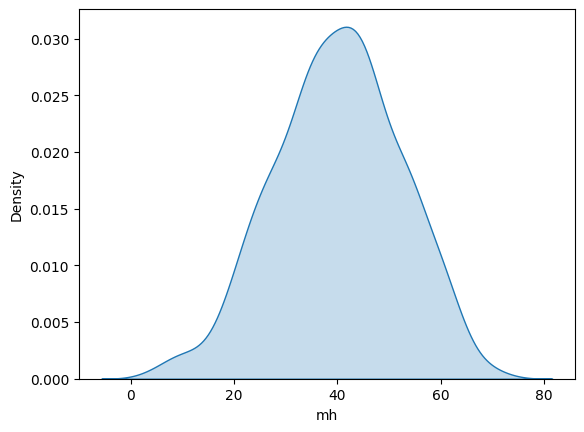

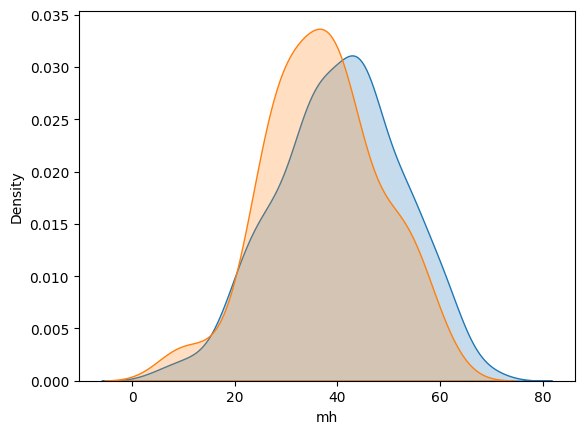

In [38]:
x0 = insite.mh[insite.futureoverdose==0]
x1 = insite.mh[insite.futureoverdose==1]
x2 = insite.mh
sns.kdeplot(x2, shade = True, label = 'Marginal')
plt.show()
sns.kdeplot(x0, fill = True, label = 'Future Overdose = 0')
sns.kdeplot(x1, fill = True, label = 'Future Overdose = 1')
plt.show()


In [39]:
n = insite.shape[0]
trainFraction = .75
sample = np.random.uniform(size = n) < trainFraction
x_train = insite.mh[ sample]
x_test =  insite.mh[~sample]
y_train = insite.futureoverdose[sample]
y_test =  insite.futureoverdose[~sample]

In [40]:
bestAccuracySoFar = 0
for t in np.sort(x_train):
  predictions = (x_train > t)
  accuracy = np.mean(y_train == predictions)
  if (accuracy > bestAccuracySoFar):
    bestThresholdSoFar = t 
    bestAccuracySoFar = accuracy 
threshold = bestThresholdSoFar

In [41]:
testPredictions = (x_test > threshold)
testAccuracy = np.mean(testPredictions == y_test)
sub0 = y_test == 0
sub1 = y_test == 1
testSpec = np.mean(y_test[sub0] == testPredictions[sub0])
testSens = np.mean(y_test[sub1] == testPredictions[sub1])
pd.DataFrame({
 'Threshold': threshold,
 'Accuracy': testAccuracy, 
 'Specificity': testSpec, 
 'Sensitivity': testSens}, index = [0])

,Threshold,Accuracy,Specificity,Sensitivity
0,71.7,0.909639,1.0,0.0


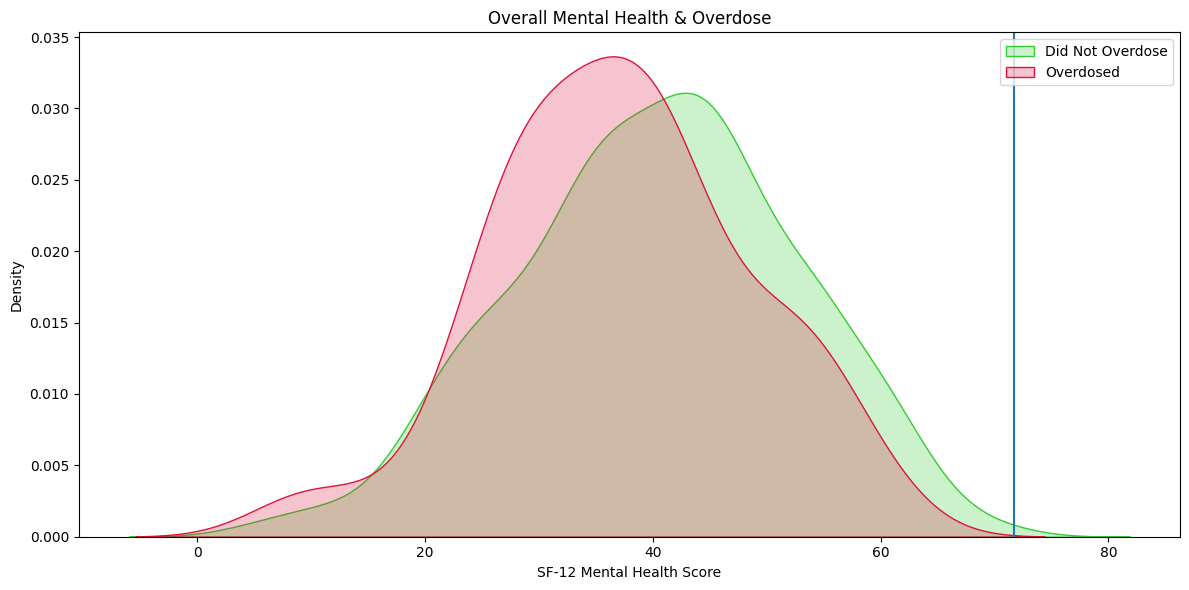

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x0, fill = True, label = 'Did Not Overdose', color='limegreen', ax=ax)
sns.kdeplot(x1, fill = True, label = 'Overdosed', color='crimson', ax=ax)
plt.axvline(x=threshold)      
plt.xlabel('SF-12 Mental Health Score')
plt.ylabel('Density')
plt.title('Overall Mental Health & Overdose')
plt.legend(loc="upper right")   
plt.tight_layout()



In [43]:
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
html = 'Data Science for Public Health 2' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Overdose & SF-12 Scores'
with open('overdosed.html','w') as f:
    f.write(html)

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, x_test)
roc_auc = auc(fpr, tpr)

<Figure size 640x480 with 0 Axes>

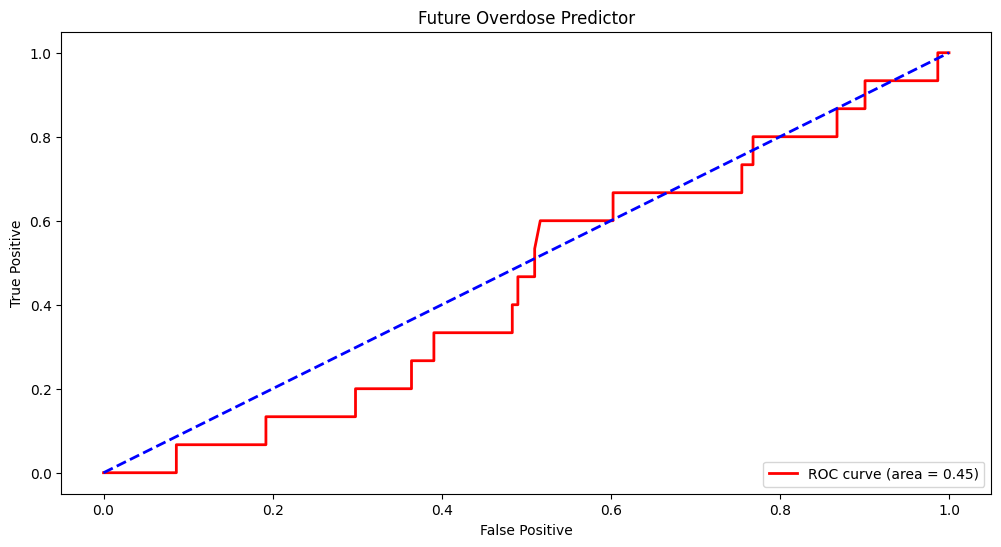

In [45]:
plt.figure()
lw = 2
fig2, ax = plt.subplots(figsize=(12,6))
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Future Overdose Predictor')
plt.legend(loc="lower right")
plt.show()

In [46]:
tmpfile = BytesIO()
fig2.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
html = 'Data Science for Public Health 2' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'ROC Curve'
with open('predict.html','w') as f:
    f.write(html)

In [47]:
model = LogisticRegression()
fit = model.fit(x_train.values.reshape(-1,1), y_train)
beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
print([beta0, beta1])

[-1.2064564234418207, -0.02360016993290201]
